In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

dir_path  = "Chessboard"
xCoord = [[np.array([]) for _ in range(9)] for _ in range(9)]
yCoord = [[np.array([]) for _ in range(9)] for _ in range(9)]

for i in range(0,1):
    dir_path = dir_path + "/test" + str(i)
    file_list = os.listdir(dir_path)
    
    for file_name in file_list:
        file_path = os.path.join(dir_path, file_name)
        image = cv2.imread(file_path)
        if image is None:
            print("image does not exit")
            continue
        image = image[100:600, 400:1000]
        
        pattern_size = (9, 9)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        found, corners = cv2.findChessboardCorners(gray, pattern_size, None)

        if not found:
            print("Chessboard Corner not Found")
            continue

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

        corners = sorted(corners, key=lambda x: (x[0][0], x[0][1]))
        corners = np.asarray(corners)
            
        cv2.drawChessboardCorners(image, pattern_size, corners, found)
        cv2.imwrite("./Corners/"+file_name, image)

        for i in range(0, 9):
            for j in range(0, 9):
                x = corners[(i-1) * 9 + (j-1)][0][0]
                y = corners[(i-1) * 9 + (j-1)][0][1]
                xCoord[i][j] = np.append(xCoord[i][j], x)
                yCoord[i][j] = np.append(yCoord[i][j], y)  



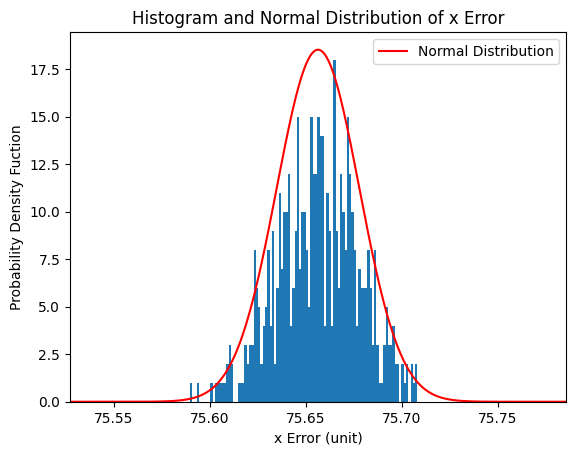

In [16]:
data = xCoord[1][3]

# draw data histogram
plt.figure()
plt.hist(data, bins=100)

mean = data.mean()
std = data.std()
d = 6 * std

x = np.linspace(mean - d, mean + d, 1000)
y = norm.pdf(x, mean, std)

# 绘制正态分布曲线
plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlim(mean - d, mean + d)
plt.legend()
plt.xlabel('x coord (unit)')
plt.ylabel('Probability Density Fuction')
plt.title(f'Histogram and Normal Distribution of x Error')
plt.show()